<h2 align="center">Text Representation Using Bag Of n-grams</h2>

* Capturing 2 words - Bi gram
* Capturing n words - n gram

more grams we will get meaning of words
Using one gram & bigram gives more meaningful

Lmitaion:
* Sparsity, high dimensinal
* Doesn't address out of vocubulary(OOV) problem

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=(2,2))
v.fit(["Delhi is the capital of India"])
v.vocabulary_

{'delhi is': 1, 'is the': 2, 'the capital': 4, 'capital of': 0, 'of india': 3}

In [2]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Delhi is the capital of India"])
v.vocabulary_

{'delhi': 2,
 'is': 5,
 'the': 9,
 'capital': 0,
 'of': 7,
 'india': 4,
 'delhi is': 3,
 'is the': 6,
 'the capital': 10,
 'capital of': 1,
 'of india': 8}

In [3]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Delhi is the capital of India"])
v.vocabulary_

{'delhi': 3,
 'is': 7,
 'the': 12,
 'capital': 0,
 'of': 10,
 'india': 6,
 'delhi is': 4,
 'is the': 8,
 'the capital': 13,
 'capital of': 1,
 'of india': 11,
 'delhi is the': 5,
 'is the capital': 9,
 'the capital of': 14,
 'capital of india': 2}

In [4]:
corpus = [
    "Thar ate pizza",
    "Madhu is tall",
    "Mithun is eating pizza"]

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)

    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)


preprocess("Thar ate pizza")

'Thar eat pizza'

In [6]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['Thar eat pizza', 'Madhu tall', 'Mithun eat pizza']

In [7]:
v = CountVectorizer(ngram_range=(1,2))

v.fit(corpus_processed)
v.vocabulary_

{'thar': 8,
 'eat': 0,
 'pizza': 6,
 'thar eat': 9,
 'eat pizza': 1,
 'madhu': 2,
 'tall': 7,
 'madhu tall': 3,
 'mithun': 4,
 'mithun eat': 5}

In [9]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [10]:
v.transform(["ABC eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

<h3>News Category Classification Problem</h3>

 we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories
 
B
BUSINE, S
SPO, TS
C, IME
SC


Dataset: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65IENCE

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [54]:
df.shape

(12695, 2)

In [15]:
df.isnull().sum()

text        0
category    0
dtype: int64

In [47]:
value_counts = df.category.value_counts()
value_counts = pd.Series(value_counts)
value_counts

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

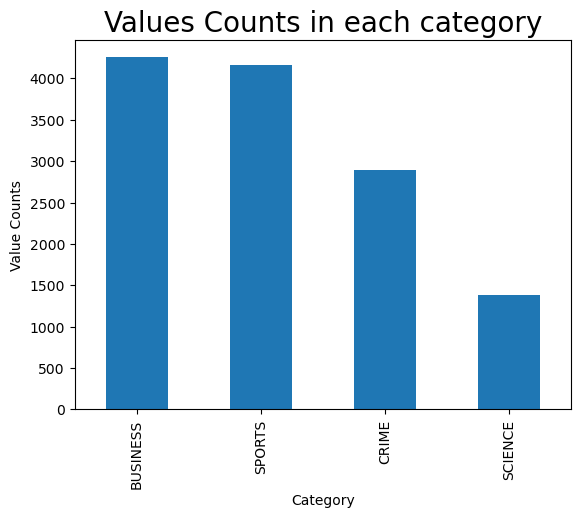

In [48]:
value_counts.plot(kind="bar",  fontsize = 10.00)
plt.xlabel("Category", fontsize=10)
plt.ylabel("Value Counts", fontsize=10)
plt.title("Values Counts in each category", fontsize=20 )
plt.show()



In [59]:
for category, count in value_counts.items():
    print("Category:", category ," | ", count," | ", "Percentage", "{:.2f}".format(count/df.shape[0]*100),"%")


Category: BUSINESS  |  4254  |  Percentage 33.51 %
Category: SPORTS  |  4167  |  Percentage 32.82 %
Category: CRIME  |  2893  |  Percentage 22.79 %
Category: SCIENCE  |  1381  |  Percentage 10.88 %


There is some imblance in the dataset, so need to handle

**Handle class imbalance**

So many techniques are there to handle, here we are using undersampling

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.

In [93]:
min_sample  = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class

df_business = df[df.category=="BUSINESS"].sample(min_sample, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_sample, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_sample, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_sample, random_state=2022)

In [64]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
df_balanced.head()

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS


In [67]:
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [68]:
df_balanced["category"] = df_balanced.category.replace({"BUSINESS": 0, "SPORTS":1, "CRIME":2, "SCIENCE":3})

In [69]:
df_balanced.head()

,text,category
11967,GCC Business Leaders Remain Confident in the F...,0
2912,From the Other Side; an Honest Review from Emp...,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",0
502,How to Market Your Business While Traveling th...,0
5279,How to Leverage Intuition in Decision-making I...,0


<h3>Build a model with original text (no pre processing)</h3>

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_balanced["text"], df_balanced["category"], test_size=0.2, random_state=52,
                                                    stratify=df_balanced.category) #to get equal number of category in each sample



In [72]:
x_train.shape

(4419,)

In [82]:
y_train.shape

(4419,)

In [73]:
x_test.shape

(1105,)

In [77]:
y_train.value_counts()

category
2    1105
3    1105
0    1105
1    1104
Name: count, dtype: int64

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [84]:
#withoun n grams
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ("MultiNB", MultinomialNB())
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       276
           1       0.93      0.87      0.90       277
           2       0.88      0.92      0.90       276
           3       0.94      0.80      0.86       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



<h3>Use 1-gram and bigrams</h3>

In [85]:
#with n grams
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("MultiNB", MultinomialNB())
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       276
           1       0.95      0.83      0.88       277
           2       0.90      0.89      0.89       276
           3       0.94      0.76      0.84       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [86]:
y_test[0:5]

6105     0
10566    0
11015    3
7295     3
8382     2
Name: category, dtype: int64

In [87]:
y_pred[0:5]

array([0, 0, 3, 0, 2], dtype=int64)

<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization</h3>

we have not done any text-processing yet to remove stop words, punctuations, apply lemmatization etc. Well we wanted to train the model without any preprocessing first and check the performance. Now we will re-do same thing but with preprocessing of text

In [89]:
df_balanced["preprocessed_tet"] = df_balanced.text.apply(preprocess)

In [90]:
df_balanced.head()

,text,category,preprocessed_tet
11967,GCC Business Leaders Remain Confident in the F...,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,0,Leverage intuition decision making feel safe r...


<h2>Build a model with pre processed text</h2>

In [91]:
x_train, x_test, y_train, y_test = train_test_split(df_balanced["preprocessed_tet"], df_balanced["category"], test_size=0.2, random_state=52,
                                                    stratify=df_balanced.category)

In [92]:
# & preprocessed text 
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("MultiNB", MultinomialNB())
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       276
           1       0.94      0.89      0.91       277
           2       0.86      0.93      0.90       276
           3       0.94      0.82      0.87       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



Conclusion: If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

<h3>Plot confusion matrix</h3>

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[247,   8,  15,   6],
       [ 12, 247,  13,   5],
       [ 11,   3, 258,   4],
       [ 30,   6,  14, 226]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

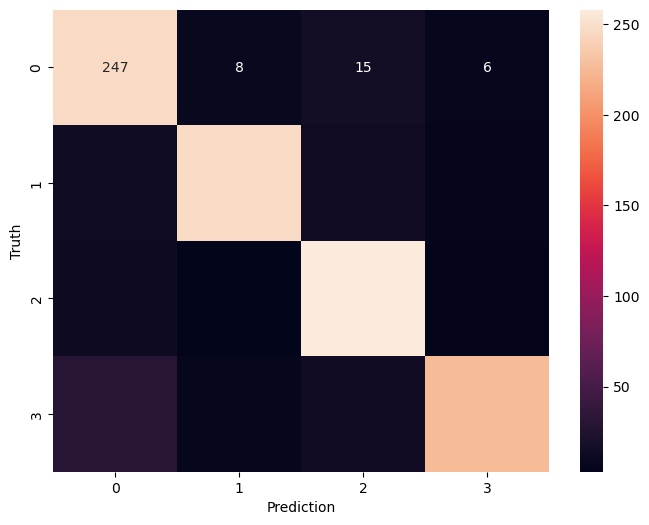

In [97]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')